In [ ]:
pip install pandas scikit-learn numpy


Note: you may need to restart the kernel to use updated packages.


In [ ]:
import pandas as pd

# Load dataset
df = pd.read_excel('Cleaned_EarthScape_Dataset_All.xlsx')

# Display the first few rows to understand the data structure
df.head()

,Data_Filenames,Data_Values,Data_Description,Normalized_Values
0,WHA1F2020,-0.162568,wheat yield change (%) from baseline under the...,0.004342
1,RIA1F2020,-0.162570,rice yield change (%) from baseline under the ...,0.004342
2,MZA1F2020,-0.162570,maize yield change (%) from baseline under the...,0.004342
3,ActChRIAIF2020,-0.159615,rice total production changes in 2020 applying...,0.004581
4,ActChMZA1F2020,-0.163315,maize total production changes in 2020 applyin...,0.004281


In [ ]:
from sklearn.model_selection import train_test_split

# Drop non-numeric columns and prepare data for modeling
X = df.drop(columns=['Data_Filenames', 'Data_Description', 'Normalized_Values'])
y = df['Normalized_Values']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.naive_bayes import GaussianNB

# Define models
models = {
    'RandomForest': RandomForestRegressor(),
    'SVM': SVR(),
    'NaiveBayes': GaussianNB()
}

# Train models
for model_name, model in models.items():
    if model_name == 'NaiveBayes':
        # Naive Bayes requires a categorical target, so bin the continuous target
        y_train_binned = pd.qcut(y_train, q=4, labels=False)
        y_test_binned = pd.qcut(y_test, q=4, labels=False)
        model.fit(X_train, y_train_binned)
    else:
        model.fit(X_train, y_train)

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Evaluate model performance
results = {}

for model_name, model in models.items():
    if model_name == 'NaiveBayes':
        y_pred = model.predict(X_test)
        y_test_used = pd.qcut(y_test, q=4, labels=False)
    else:
        y_pred = model.predict(X_test)
        y_test_used = y_test
    
    mae = mean_absolute_error(y_test_used, y_pred)
    mse = mean_squared_error(y_test_used, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test_used, y_pred)
    
    results[model_name] = {
        'MAE': mae,
        'MSE': mse,
        'RMSE': rmse,
        'R²': r2
    }

# Display the results
results_df = pd.DataFrame(results).T
print(results_df)

                   MAE           MSE      RMSE        R²
RandomForest  0.000003  5.471719e-11  0.000007  0.993625
SVM           0.000179  3.787382e-08  0.000195 -3.412352
NaiveBayes    0.583333  1.083333e+00  1.040833  0.133333


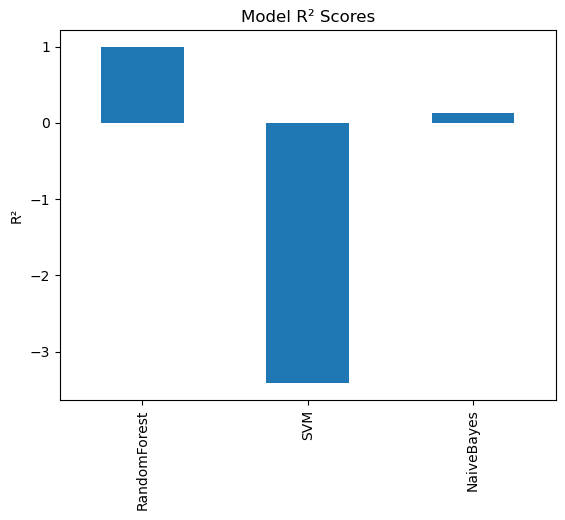

In [ ]:
import matplotlib.pyplot as plt

# Plot R² scores for each model
results_df['R²'].plot(kind='bar', title='Model R² Scores')
plt.ylabel('R²')
plt.show()

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.naive_bayes import GaussianNB

# Load the dataset
df = pd.read_excel('Cleaned.xlsx')

# Drop non-numeric columns and prepare data for modeling
X = df.drop(columns=['Data_Filenames', 'Data_Description', 'Normalized_Values'])
y = df['Normalized_Values']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the models
models = {
    'RandomForest': RandomForestRegressor(),
    'SVM': SVR(),
    'NaiveBayes': GaussianNB()
}

# Train the models
for model_name, model in models.items():
    if model_name == 'NaiveBayes':
        # Naive Bayes requires categorical data, so bin the target variable
        y_train_binned = pd.qcut(y_train, q=4, labels=False)
        model.fit(X_train, y_train_binned)
    else:
        model.fit(X_train, y_train)

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Evaluate model performance
results = {}

for model_name, model in models.items():
    if model_name == 'NaiveBayes':
        # Make predictions for NaiveBayes on binned data
        y_pred = model.predict(X_test)
        y_test_binned = pd.qcut(y_test, q=4, labels=False)
        mae = mean_absolute_error(y_test_binned, y_pred)
        mse = mean_squared_error(y_test_binned, y_pred)
        r2 = r2_score(y_test_binned, y_pred)
    else:
        # Make predictions for RF and SVM
        y_pred = model.predict(X_test)
        mae = mean_absolute_error(y_test, y_pred)
        mse = mean_squared_error(y_test, y_pred)
        r2 = r2_score(y_test, y_pred)
    
    rmse = np.sqrt(mse)
    results[model_name] = {
        'MAE': mae,
        'MSE': mse,
        'RMSE': rmse,
        'R²': r2
    }

# Display the evaluation results
results_df = pd.DataFrame(results).T
print(results_df)

                   MAE           MSE      RMSE        R²
RandomForest  0.000002  4.424946e-11  0.000007  0.994845
SVM           0.000179  3.787382e-08  0.000195 -3.412352
NaiveBayes    0.583333  1.083333e+00  1.040833  0.133333


In [ ]:
# Predict using the best performing model (Random Forest in this case)
rf_model = models['RandomForest']
y_pred_rf = rf_model.predict(X_test)

# Show the predicted values along with actual values for comparison
predicted_output = pd.DataFrame({
    'Actual': y_test,
    'Predicted': y_pred_rf
})

print(predicted_output.head())  # Display first few rows of actual vs predicted

      Actual  Predicted
83  0.004024   0.004031
4   0.004281   0.004282
42  0.004342   0.004342
40  0.004535   0.004560
10  0.004342   0.004342


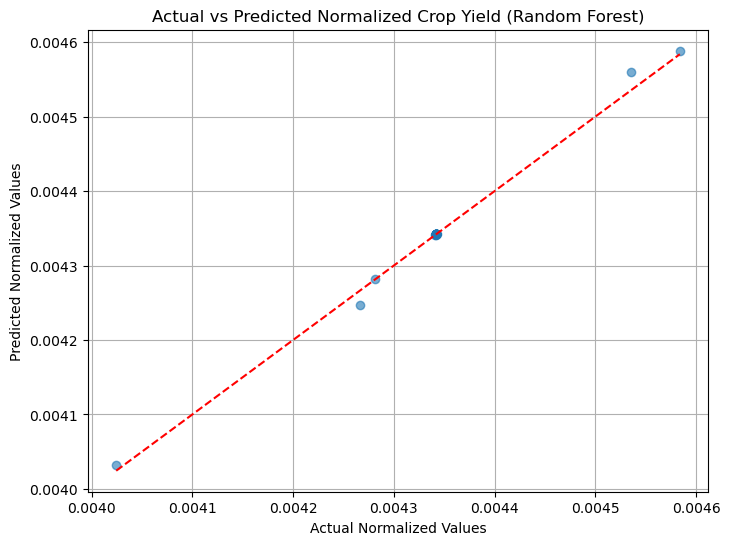

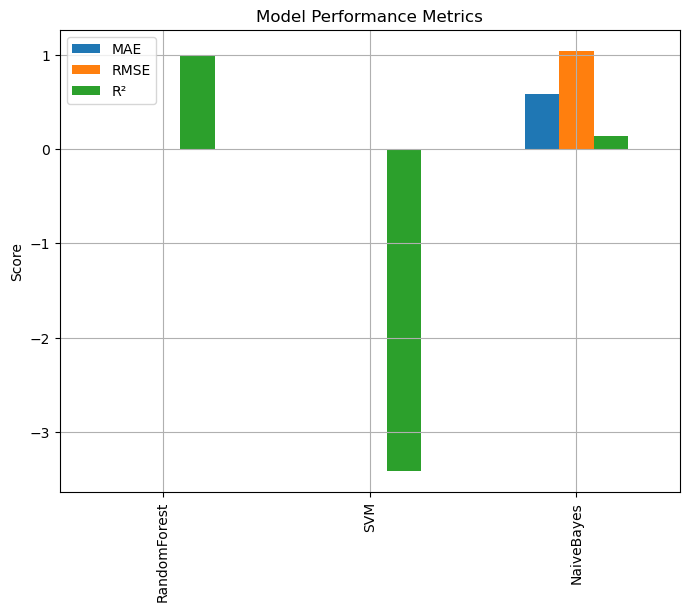

In [ ]:
import matplotlib.pyplot as plt

# Scatter plot: Actual vs Predicted values for Random Forest
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_rf, alpha=0.6)
plt.title('Actual vs Predicted Normalized Crop Yield (Random Forest)')
plt.xlabel('Actual Normalized Values')
plt.ylabel('Predicted Normalized Values')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.grid(True)
plt.show()

# Bar chart for model performance metrics (MAE, RMSE, and R²)
results_df[['MAE', 'RMSE', 'R²']].plot(kind='bar', title='Model Performance Metrics', figsize=(8, 6))
plt.ylabel('Score')
plt.grid(True)
plt.show()